## Reto 1: K-Medias

### 1. Objetivos:
    - Aprender a aplicar un algoritmo de K-Medias
    
---
    
### 2. Desarrollo:

### Segmentación por subregiones de los usuarios de un producto

Tenemos un conjunto de datos llamado 'distribucion_usuarios.csv'. En este dataset tenemos las latitudes y longitudes de todos los usuarios de un producto que viven en una misma región. Como compañía, queremos establecer centros de servicio al cliente para atender todas las demandas de servicios en esta región. Vamos a utilizar el algoritmo K-Medias para segmentar nuestra región en subregiones. Cada subregión tendrá un centro de servicio en su centroide.

El dataset también contiene el código único de cada usuario y 4 columnas llamadas: 'producto_1', 'producto_2', 'producto_3', 'producto_4'. Estas columnas contienen un 1 en caso de que el usuario haya adquirido ese producto, y un 0 en caso de que el producto no haya sido adquirido.

Tu Reto consiste en lo siguiente:

1. Lee el dataset 'distribucion_usuarios.csv'.
2. Utiliza un scatterplot para visualizar las latitudes y longitudes de tu conjunto de datos.
3. Después utiliza la clase KMeans de `scikit-learn` para encontrar 7 centroides.
4. Ya que hayas encontrado tus centroides, crea una nueva visualización donde además de tus puntos, grafiques los 7 centros.
5. Ahora, utiliza tu modelo para clasificar tus puntos.
6. Después agrega segmentación por color a tu gráfica para que los puntos se coloreen de acuerdo al grupo al que pertenecen.
7. Ya que tienes tus puntos clasificados, agrega la clasificación al DataFrame original.
8. Ahora, segmenta tu DataFrame por grupo y obtén los siguientes datos:
    1. Cantidad total de usuarios por grupo
    2. Cantidades totales de producto 1, 2, 3 y 4 por grupo
9. Realiza una gráfica de barras para visualizar la cantidad de usuarios que hay en cada uno de los grupos
10. Finalmente, genera una gráfica de barras apiladas con los totales de productos adquiridos por grupo. Cada segmento de la barra será la cantidad de producto adquirido en un grupo en específico.
11. Comenta tus hallazgos con tus compañeros y la experta.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto distribucion_usuarios-1.csv')
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759


Text(0.5, 1.0, 'Distribución')

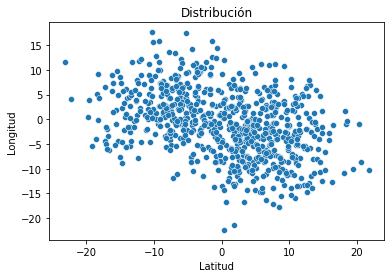

In [38]:
sns.scatterplot(x=df['latitud'], y=df['longitud'])
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Distribución')

In [39]:
kmeans = KMeans(n_clusters=7, max_iter=10_000)
kmeans.fit(df[['latitud','longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
centers = kmeans.cluster_centers_
centers

array([[  7.45102764,   4.63587329],
       [ -5.71182769,  -0.92447975],
       [  4.93298392, -10.87499909],
       [-14.50218331,   0.85843488],
       [  2.90523659,  -1.93795187],
       [ -6.35412715,   8.36004507],
       [ 12.14905338,  -5.20567218]])

Text(0.5, 1.0, 'Centroides y distribución')

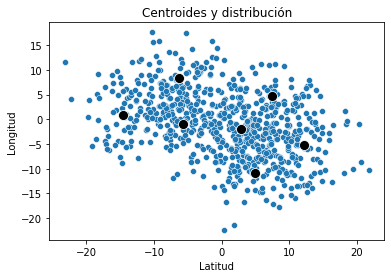

In [41]:
sns.scatterplot(x = df['latitud'], y = df['longitud'])
sns.scatterplot(x = centers[:,0], y = centers[:,1], color='black', s=100)
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Centroides y distribución')

Text(0.5, 1.0, 'Grupos')

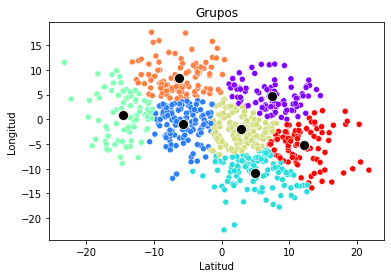

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
classification = kmeans.predict(df[['latitud','longitud']])
sns.scatterplot(x=df['latitud'],y=df['longitud'],hue=classification, palette='rainbow', ax=ax)
sns.scatterplot(x=centers[:,0],y=centers[:,1],color='black',s=100, ax=ax)
ax.get_legend().remove()
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Grupos')

In [43]:
classification

array([6, 3, 0, 5, 1, 4, 6, 5, 1, 1, 5, 4, 4, 1, 2, 0, 2, 1, 4, 5, 2, 0,
       6, 5, 3, 5, 4, 1, 3, 4, 4, 2, 1, 0, 6, 6, 6, 2, 2, 3, 2, 1, 5, 4,
       5, 4, 0, 4, 3, 1, 1, 5, 6, 1, 5, 4, 5, 2, 4, 3, 5, 1, 0, 5, 0, 2,
       1, 3, 5, 2, 0, 2, 1, 4, 4, 6, 4, 1, 6, 1, 2, 1, 5, 2, 5, 1, 1, 5,
       5, 2, 1, 6, 3, 0, 5, 2, 0, 0, 0, 3, 3, 4, 5, 1, 1, 6, 5, 1, 5, 0,
       2, 6, 1, 2, 5, 4, 2, 1, 2, 0, 3, 4, 0, 5, 1, 4, 5, 0, 6, 1, 6, 4,
       0, 4, 2, 3, 1, 1, 3, 1, 2, 6, 4, 2, 3, 0, 6, 4, 1, 5, 6, 3, 1, 2,
       1, 5, 1, 6, 6, 2, 3, 4, 5, 6, 4, 5, 1, 0, 1, 3, 0, 5, 5, 1, 0, 5,
       4, 1, 6, 1, 0, 6, 5, 5, 1, 0, 1, 1, 4, 2, 1, 4, 5, 0, 2, 4, 6, 2,
       6, 2, 1, 6, 0, 4, 2, 4, 2, 6, 1, 0, 4, 4, 6, 3, 2, 0, 2, 0, 1, 6,
       4, 5, 1, 1, 4, 2, 1, 2, 1, 0, 0, 6, 5, 2, 6, 5, 2, 6, 5, 6, 3, 6,
       5, 4, 1, 1, 2, 0, 4, 4, 4, 0, 4, 2, 4, 2, 4, 1, 5, 3, 5, 0, 3, 5,
       6, 5, 2, 2, 2, 1, 4, 6, 0, 5, 2, 6, 0, 1, 5, 5, 0, 2, 0, 4, 1, 2,
       1, 5, 1, 2, 1, 6, 4, 2, 0, 6, 6, 3, 2, 4, 5,

In [44]:
serie_grupos = pd.Series(classification)
serie_grupos

0      6
1      3
2      0
3      5
4      1
      ..
744    3
745    4
746    4
747    3
748    4
Length: 749, dtype: int32

In [45]:
df['Grupo'] = serie_grupos

In [46]:
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud,Grupo
0,1,0,0,0,0,14.277305,-5.958917,6
1,2,0,0,1,0,-9.958963,1.036839,3
2,3,0,0,1,0,7.859551,1.932572,0
3,4,1,1,1,1,-8.989976,6.969268,5
4,5,1,0,0,0,-6.641690,-0.777759,1


In [47]:
df.groupby('Grupo').size()

Grupo
0     88
1    129
2    109
3     78
4    142
5    109
6     94
dtype: int64

In [50]:
df['total'] = df['producto_1']+df['producto_2']+df['producto_3']+df['producto_4']

In [53]:
df.groupby('total').size()

total
0     79
1    303
2    294
3     67
4      6
dtype: int64